In [1]:
#Libraries
import pandas as pd
import seaborn as sns
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import csv
import sys, pprint
from sqlalchemy import create_engine # database connection


In [2]:
#Load Data
df = pd.read_csv('train.csv')

In [3]:
#Add new column called labeld to split data into toxic and non toxic
#If Labeled column is 0, this means that the comment is not toxic at all

x=df['toxic']+df['severe_toxic']+df['obscene']+df['threat']+df['insult']+df['identity_hate']
df['labeled']=x

In [4]:
#Check how non zeros rows are there for each columns
df.astype(bool).sum(axis=0)

id               159571
comment_text     159571
toxic             15294
severe_toxic       1595
obscene            8449
threat              478
insult             7877
identity_hate      1405
labeled           16225
dtype: int64

In [233]:
#Number of comments that are non toxic
159571-16225

143346

In [234]:
#Number of comments to delete
143346-16225

127121

In [235]:
#Percentage of toxic to nontoxic is
16225/143346

0.1131876717871444

In [5]:
#Create two data frames, one that has only toxic comments
#And another one that has only non toxic comments

toxic=df[df.labeled != 0]
nontoxic=df[df.labeled == 0]

In [7]:
df['total_length'] = df['comment_text'].apply(len)

In [8]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,labeled,total_length
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,0,264
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,0,112
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,0,233
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,0,622
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,0,67


In [6]:
#For testing you can check numer of toxic or no toxic comments by changing the toxic to nontoxic and runing the code below
nontoxic.astype(bool).sum(axis=0)

id               143346
comment_text     143346
toxic                 0
severe_toxic          0
obscene               0
threat                0
insult                0
identity_hate         0
labeled               0
dtype: int64

In [238]:
#Sample number 1 of non-toxic comments, this sample has only 16225 rows
nontoxic1=nontoxic.drop(nontoxic.index[1:127121])

In [239]:
#Sample number 2 of non-toxic comments, this sample has only 16225 rows
nontoxic2=nontoxic.drop(nontoxic.index[1000:128121])

In [240]:
#Sample number 3 of non-toxic comments, this sample has only 16225 rows
nontoxic3=nontoxic.drop(nontoxic.index[2000:129121])

In [241]:
#Sample number 4 of non-toxic comments, this sample has only 16225 rows
nontoxic4=nontoxic.drop(nontoxic.index[12000:139121])

In [242]:
#Sample number 5 of non-toxic comments, this sample has only 16225 rows
nontoxic5=nontoxic.drop(nontoxic.index[16225:143346])

In [243]:
#This code is to create one data frame that has coments which are toxic and non-toxic
frame1 = [toxic, nontoxic1]
frame2 = [toxic, nontoxic2]
frame3 = [toxic, nontoxic3]
frame4 = [toxic, nontoxic4]
frame5 = [toxic, nontoxic5]



In [244]:
#This code is to create one data frame that has coments which are toxic and non-toxic
result1 = pd.concat(frame1)
result2 = pd.concat(frame2)
result3 = pd.concat(frame3)
result4 = pd.concat(frame4)
result5 = pd.concat(frame5)

In [245]:
#This code is shuffle comments (toxic and non-toxic) 
#Then save data frame to CSV. We have 5 files that has different non-toxic comments
result1 = result1.sample(frac=1).reset_index(drop=True)
result1.to_csv("train1.csv", encoding="utf-8",index=False) 

In [246]:
result2 = result2.sample(frac=1).reset_index(drop=True)
result2.to_csv("train2.csv", encoding="utf-8",index=False) 

In [247]:
result3 = result3.sample(frac=1).reset_index(drop=True)
result3.to_csv("train3.csv", encoding="utf-8",index=False) 

In [248]:
result4 = result4.sample(frac=1).reset_index(drop=True)
result4.to_csv("train4.csv", encoding="utf-8",index=False) 

In [249]:
result5 = result5.sample(frac=1).reset_index(drop=True)
result5.to_csv("train5.csv", encoding="utf-8",index=False) 

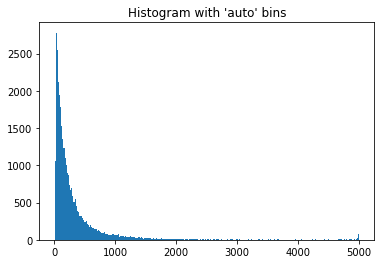

In [17]:
#Jus
df = pd.read_csv('train1.csv')
df['total_length'] = df['comment_text'].apply(len)

rng = df['total_length']  # deterministic random data

plt.hist(rng, bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram with 'auto' bins")
plt.show()

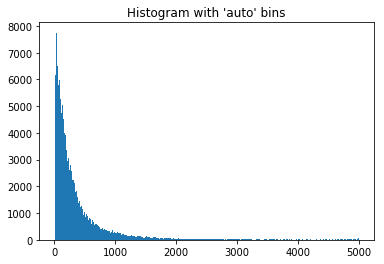

In [18]:
#Load Data
df = pd.read_csv('train.csv')
df['total_length'] = df['comment_text'].apply(len)

rng = df['total_length']  # deterministic random data

plt.hist(rng, bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram with 'auto' bins")
plt.show()